In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv")
sun_data = data.copy()
sun_data.drop(['Day', 'Hour','Minute'], axis='columns', inplace=True)
sun_data.head()

,DHI,DNI,WS,RH,T,TARGET
0,0,0,1.5,69.08,-12,0.0
1,0,0,1.5,69.06,-12,0.0
2,0,0,1.6,71.78,-12,0.0
3,0,0,1.6,71.75,-12,0.0
4,0,0,1.6,75.20,-12,0.0


In [3]:
sun_data[30:40]

,DHI,DNI,WS,RH,T,TARGET
30,62,0,2.5,68.55,-5,5.818888
31,73,39,2.2,68.55,-5,7.602096
32,41,11,2.0,70.27,-6,4.035725
33,10,0,2.0,70.28,-6,0.938541
34,0,0,2.0,71.33,-7,0.000000
35,0,0,2.0,71.35,-7,0.000000
36,0,0,2.1,76.43,-8,0.000000
37,0,0,2.2,76.44,-8,0.000000
38,0,0,2.3,76.72,-8,0.000000
39,0,0,2.2,76.72,-8,0.000000


In [4]:
def create_data(data):
    data_X, data_Y = [], []
    data_X = np.array(sun_data.loc[:, ["DHI", "DNI", "WS", "RH", "T"]].values)
    data_Y = np.array(sun_data.loc[:, ["TARGET"]].values)
    return data_X, data_Y

X, Y = create_data(sun_data)
X[:10], Y[:10]

(array([[  0.  ,   0.  ,   1.5 ,  69.08, -12.  ],
        [  0.  ,   0.  ,   1.5 ,  69.06, -12.  ],
        [  0.  ,   0.  ,   1.6 ,  71.78, -12.  ],
        [  0.  ,   0.  ,   1.6 ,  71.75, -12.  ],
        [  0.  ,   0.  ,   1.6 ,  75.2 , -12.  ],
        [  0.  ,   0.  ,   1.5 ,  69.29, -11.  ],
        [  0.  ,   0.  ,   1.5 ,  72.56, -11.  ],
        [  0.  ,   0.  ,   1.4 ,  72.55, -11.  ],
        [  0.  ,   0.  ,   1.3 ,  74.62, -11.  ],
        [  0.  ,   0.  ,   1.3 ,  74.61, -11.  ]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

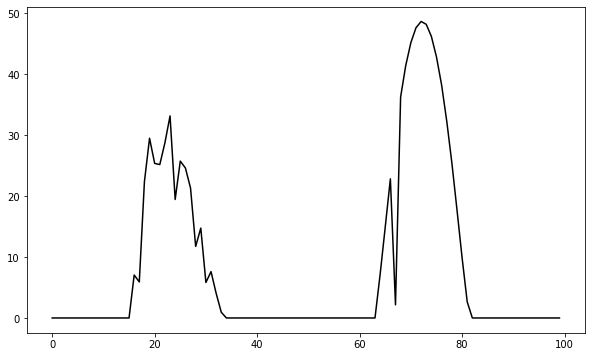

In [5]:
 def timeseries (x_axis, y_axis) : 
    plt.figure (figsize = (10, 6)) 
    plt.plot (x_axis, y_axis, color = 'black')

 timeseries (range(100), Y[:100])

In [6]:
X.shape, Y.shape

((52560, 5), (52560, 1))

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
input_scaler = scaler.fit(X)
output_scaler = scaler.fit(Y)
X = input_scaler.transform(X)
Y = output_scaler.transform(Y)

# scaler = MinMaxScaler(feature_range = (0, 1))
# input_scaler = scaler.fit(X)
# output_scaler = scaler.fit(Y)
# X = input_scaler.transform(X)
# Y = output_scaler.transform(Y)

X[:10], Y[:10]

(array([[-0.69063783, -0.69063783, -0.63240736,  1.99106943, -1.15648159],
        [-0.69063783, -0.69063783, -0.63240736,  1.99029302, -1.15648159],
        [-0.69063783, -0.69063783, -0.62852533,  2.09588427, -1.15648159],
        [-0.69063783, -0.69063783, -0.62852533,  2.09471966, -1.15648159],
        [-0.69063783, -0.69063783, -0.62852533,  2.22864975, -1.15648159],
        [-0.69063783, -0.69063783, -0.63240736,  1.99922169, -1.11766128],
        [-0.69063783, -0.69063783, -0.63240736,  2.12616412, -1.11766128],
        [-0.69063783, -0.69063783, -0.63628939,  2.12577592, -1.11766128],
        [-0.69063783, -0.69063783, -0.64017142,  2.20613396, -1.11766128],
        [-0.69063783, -0.69063783, -0.64017142,  2.20574576, -1.11766128]]),
 array([[-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783],
        [-0.69063783]]))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39420, 5), (39420, 1), (13140, 5), (13140, 1))

In [11]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [12]:
X_train, y_train = create_dataset(X_train, y_train, 240)
X_test, y_test= create_dataset(X_test, y_test, 240)

In [13]:
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (12900, 240, 5)
y_train.shape:  (39180, 1)
X_test.shape:  (12900, 240, 5)
y_test.shape:  (39180, 1)


In [13]:
#model_1
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Activation, LSTM, Dropout, Bidirectional, GRU
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(LSTM(64, dropout=0.3, activation="elu", return_sequences=True, input_shape=[48,5]))
model.add(LSTM(64, dropout=0.3, activation="elu"))
model.add(Dense(1))
optimizer = RMSprop(0.001)
model.compile(loss="mean_squared_error", optimizer = optimizer)

# filepath = "weights/" + "lstm_model" + "-{epoch:02d}-{val_accuracy:.4f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]  /// callbacks=callbacks_list

history = model.fit(X_train, y_train, epochs=100, batch_size=128, shuffle=False, validation_split=0.1)

KeyboardInterrupt: ignored

In [22]:
#model_2
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Activation, LSTM, Dropout, Bidirectional, GRU

# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    optimizer = RMSprop(0.001)
    model.compile(loss="mean_squared_error", optimizer = optimizer)
    return model

# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.5))
    model.add(m (units = units))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1))

    #Compile model
    optimizer = RMSprop(0.001)
    model.compile(loss="mean_squared_error", optimizer = optimizer)
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)

# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

In [23]:
#model_2_fit
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 256,
                        shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
123/123 [==============================] - 13s 56ms/step - loss: 1.0158 - val_loss: 1.0151
Epoch 2/100
123/123 [==============================] - 6s 47ms/step - loss: 1.0020 - val_loss: 1.0065
Epoch 3/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9996 - val_loss: 1.0033
Epoch 4/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9983 - val_loss: 1.0021
Epoch 5/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9975 - val_loss: 1.0017
Epoch 6/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9968 - val_loss: 1.0018
Epoch 7/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9961 - val_loss: 1.0022
Epoch 8/100
123/123 [==============================] - 6s 47ms/step - loss: 0.9954 - val_loss: 1.0029
Epoch 9/100
123/123 [==============================] - 6s 48ms/step - loss: 0.9946 - val_loss: 1.0040
Epoch 10/100
123/123 [==============================] - 6s 47ms/step - loss: 0.99

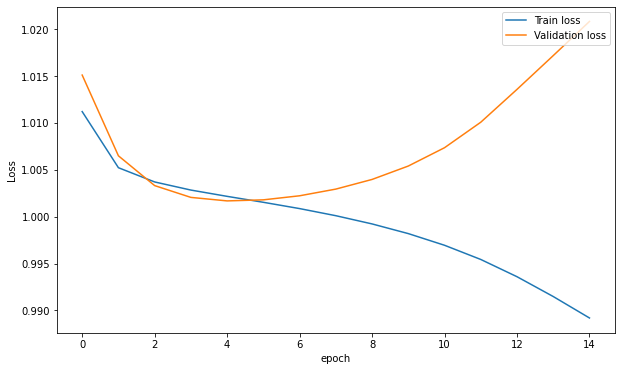

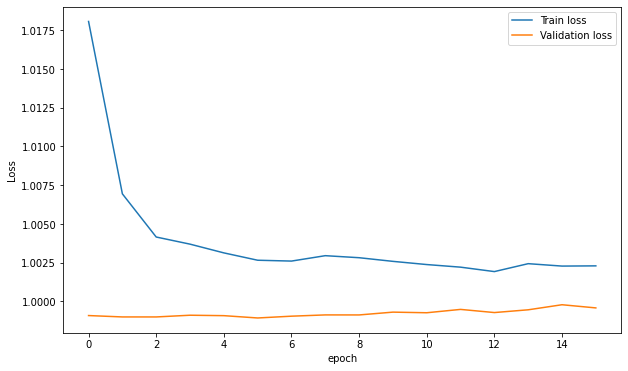

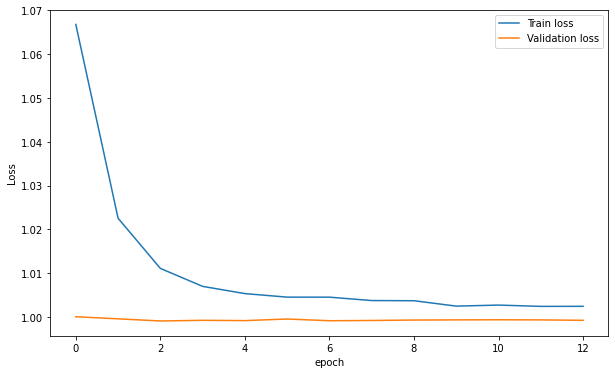

In [24]:
 def plot_loss (history) : 
    plt.figure (figsize = (10, 6)) 
    plt.plot (history.history [ 'loss']) 
    plt.plot (history.history [ 'val_loss'] ) 
    plt.ylabel ( 'Loss') 
    plt.xlabel ( 'epoch') 
    plt.legend ([ 'Train loss', 'Validation loss'], loc = 'upper right')
plot_loss (history_bilstm) 
plot_loss (history_lstm) 
plot_loss (history_gru)

In [25]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

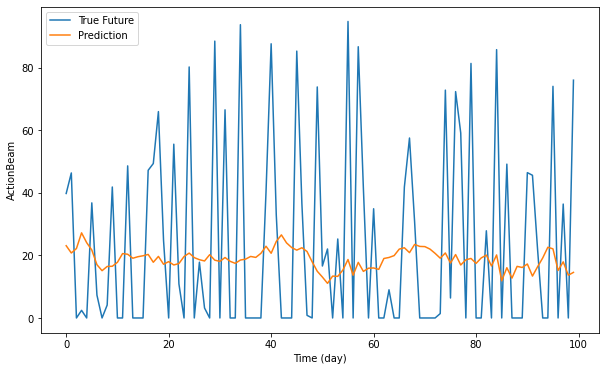

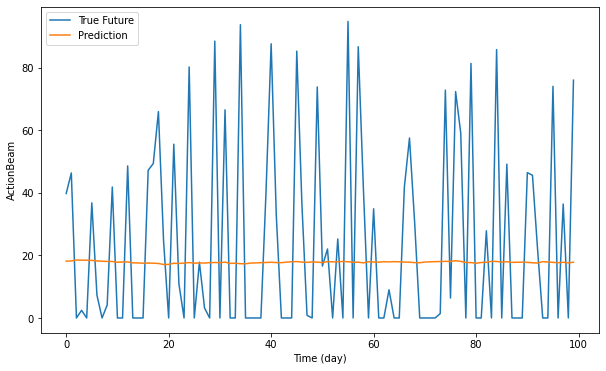

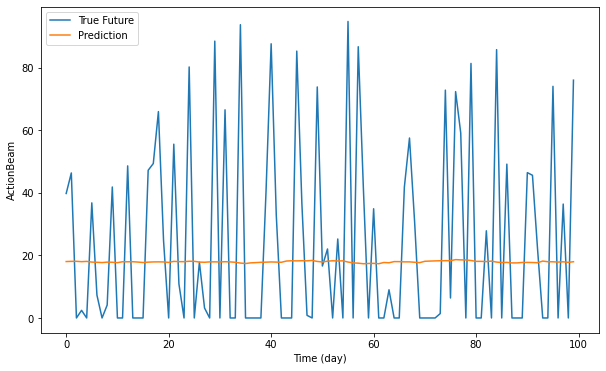

In [26]:
def prediction(model):
    prediction = model.predict(X_test[:100])
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('ActionBeam')

plot_future(prediction_bilstm, y_test[:100])
plot_future(prediction_lstm, y_test[:100])
plot_future(prediction_gru, y_test[:100])

In [27]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_bilstm, y_test[:100], 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test[:100], 'LSTM')
evaluate_prediction(prediction_gru, y_test[100], 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 25.4728
Root Mean Square Error: 30.8085

LSTM:
Mean Absolute Error: 25.3053
Root Mean Square Error: 30.9499

GRU:
Mean Absolute Error: 17.9365
Root Mean Square Error: 17.9384

